In [1]:
import pandas as pd
import numpy as np
import math
import statistics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [162]:
kcdf = pd.read_csv('~/Documents/GitHub/regression-washington/data/kc_house_data.csv')
train_data = pd.read_csv('~/Documents/GitHub/regression-washington/data/wk3_kc_house_train_data.csv')
test_data = pd.read_csv('~/Documents/GitHub/regression-washington/data/wk3_kc_house_test_data.csv')
val_data = pd.read_csv('~/Documents/GitHub/regression-washington/data/wk3_kc_house_valid_data.csv')

In [10]:
#2. Write your own function called ‘polynomial_sframe’ (or otherwise) which accepts an array ‘feature’ and 
#a maximal ‘degree’ and returns an data frame (e.g. SFrame) with the first column equal to ‘feature’ and the 
#remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

def polynomial_df(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_frame = pd.DataFrame()
    poly_frame['power_1'] = feature**1
    # and set poly_sframe['power_1'] equal to the passed feature
    #poly_frame.columns = ['power_1']
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_frame[name] = feature**power
    return poly_frame


In [11]:
kcdf = kcdf.sort_values(by = ['sqft_living','price'])


In [31]:
#4. Make a 1 degree polynomial SFrame with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’.
#5. Add sales[‘price’] to poly1_data as this will be our output variable. e.g. if you’re using SFrames
poly1_data = polynomial_df(kcdf['sqft_living'], 1)
poly1_data['price'] = kcdf['price']
poly2_data = polynomial_df(kcdf['sqft_living'], 2)


In [22]:
model1 = linear_model.LinearRegression()
Y_train = poly1_data[['price']]
X_train = poly1_data[['power_1']]
model1.fit(X_train, Y_train)
model1.intercept_,model1.coef_

In [38]:
model2 = linear_model.LinearRegression()
Y_train = kcdf['price']
X_train2 = poly2_data
model2.fit(X_train2, Y_train)
model2.coef_

array([6.79940947e+01, 3.85812609e-02])

In [71]:
%matplotlib inline
# Data for plotting
def plot_pol_reg(feature, degree, y):
    %matplotlib inline
    model = linear_model.LinearRegression()
    Y_train = y
    X_train = polynomial_df(feature, degree)
    model.fit(X_train, Y_train)
    reg_line = model.predict(X_train)
    fig, ax = plt.subplots()
    ax.plot(feature, Y_train,'.',feature, model.predict(X_train))
    ax.set(xlabel='feature', ylabel='Response',
       title='About as simple as it gets, folks')
    return ax.grid(), model.coef_

(None, array([280.6235679]))

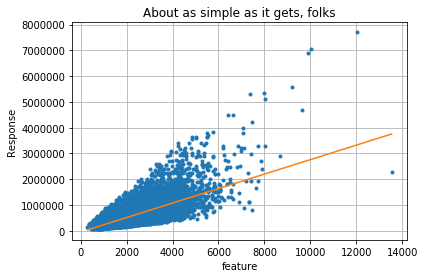

In [72]:
plot_pol_reg(kcdf['sqft_living'], 1, kcdf['price'])

(None, array([6.79940947e+01, 3.85812609e-02]))

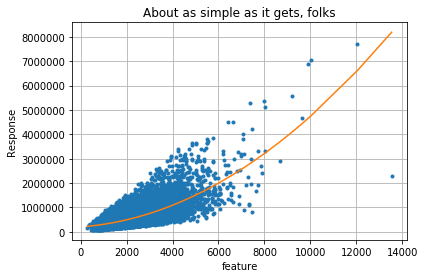

In [73]:
plot_pol_reg(kcdf['sqft_living'], 2, kcdf['price'])

(None, array([-9.01819864e+01,  8.70465089e-02, -3.84055260e-06]))

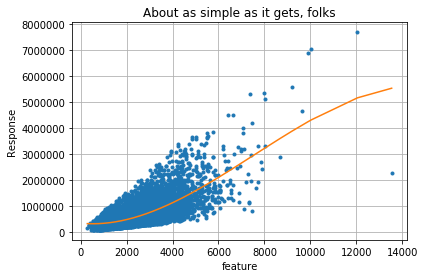

In [74]:
plot_pol_reg(kcdf['sqft_living'], 3, kcdf['price'])

(None,
 array([ 1.71098448e-05,  4.21658951e-02,  4.60494903e-06, -4.52668531e-10,
        -2.27857379e-14, -2.34109771e-16, -5.23220444e-16,  3.52129611e-16,
        -2.03911246e-16, -2.64470147e-16,  1.02317890e-16,  7.18195395e-16,
         4.17519616e-16, -3.94017242e-16,  4.17366833e-17]))

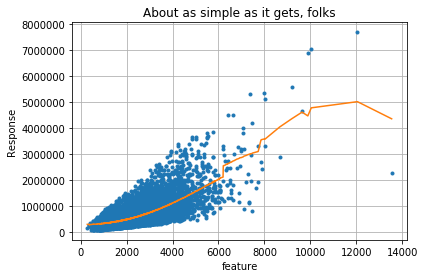

In [75]:
plot_pol_reg(kcdf['sqft_living'], 15, kcdf['price'])

In [70]:
set1 = pd.read_csv('~/Documents/GitHub/regression-washington/data/wk3_kc_house_set_1_data.csv')
set2 = pd.read_csv('~/Documents/GitHub/regression-washington/data/wk3_kc_house_set_2_data.csv')
set3 = pd.read_csv('~/Documents/GitHub/regression-washington/data/wk3_kc_house_set_3_data.csv')
set4 = pd.read_csv('~/Documents/GitHub/regression-washington/data/wk3_kc_house_set_4_data.csv')

(None,
 array([ 1.76550428e-05,  4.45509680e-02,  4.13358678e-06, -4.47829782e-10,
        -2.26629101e-14,  8.66459357e-17, -7.10022593e-16,  2.87387409e-16,
        -1.73678869e-16, -1.27952810e-15,  1.28237831e-16,  5.47423495e-16,
         1.94293549e-16, -3.17429382e-16, -3.76911003e-16]))

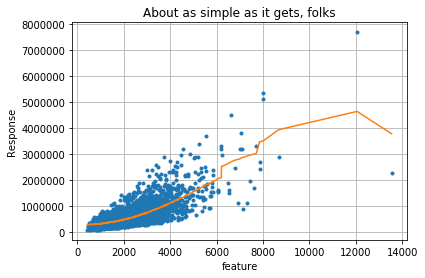

In [76]:
plot_pol_reg(set1['sqft_living'], 15, set1['price'])

(None,
 array([ 3.00702140e-05,  6.13409370e-02, -2.50249320e-06,  1.11274978e-10,
        -1.76127300e-14,  7.95325890e-16, -3.77211973e-16, -3.00519069e-16,
        -6.03067898e-16,  3.82815008e-16,  7.10119182e-16,  7.56537076e-16,
         1.03981187e-15, -4.62184993e-16,  1.35047128e-15]))

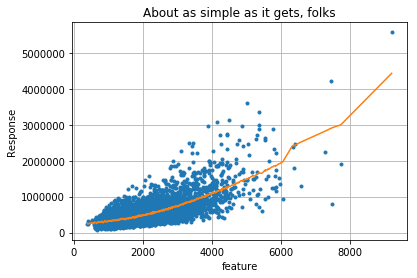

In [77]:
plot_pol_reg(set2['sqft_living'], 15, set2['price'])

(None,
 array([ 3.05482239e-05,  6.76830276e-02, -5.33847268e-06,  4.60969615e-10,
        -1.31254010e-14, -1.48664069e-16, -3.53096869e-16,  5.66467731e-16,
         4.35166869e-16,  5.26252752e-16, -2.25642047e-16,  1.12771915e-15,
         6.15886890e-16,  3.23841045e-16, -2.48747667e-16]))

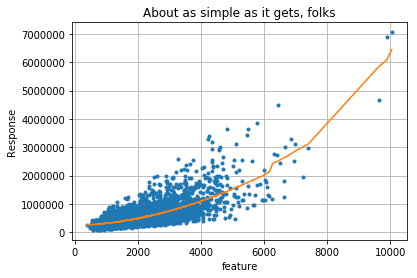

In [78]:
plot_pol_reg(set3['sqft_living'], 15, set3['price'])

(None,
 array([ 2.92941485e-05,  5.47652842e-02, -1.43653635e-06,  7.34429521e-11,
         3.46617963e-14, -1.24090168e-15, -4.00055436e-16,  8.90618730e-16,
        -4.98019779e-16, -5.52234464e-16,  2.73592849e-16,  4.08783287e-16,
         2.84653854e-16, -1.04285631e-15, -3.20203064e-16]))

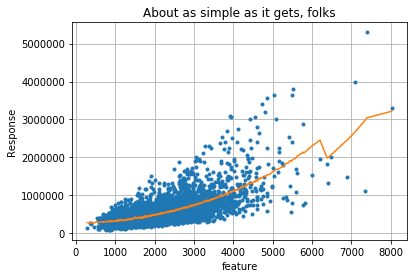

In [79]:
plot_pol_reg(set4['sqft_living'], 15, set4['price'])

In [ ]:
def return_rss(feature, degree, y):
    for i in range(14):
    model_training = linear_model.LinearRegression()
    Y_train = y
    X_train = polynomial_df(feature, degree)
    model.fit(X_train, Y_train)
   

In [172]:
models = {}
for i in range(15):
    model_training = linear_model.LinearRegression()
    Y_train = train_data['price']
    X_train = polynomial_df(train_data['sqft_living'], i+1)
    #model_training.fit(X_train, Y_train)
    models.setdefault(i+1, []).append(model_training.fit(X_train, Y_train))
    Y_valid = val_data['price']
    X_valid = polynomial_df(val_data['sqft_living'], i+1)
    RSS = sum((Y_valid - models[i+1][0].predict(X_valid))**2)
#   RSS = sum((Y_train - models[i+1][0].predict(X_train))**2)
    models[i+1].append(RSS)


    


In [173]:
models

{1: [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False), 629097886299587.4],
 2: [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False), 623955062706519.6],
 3: [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False), 625820280251629.0],
 4: [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False), 629987339076002.0],
 5: [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False), 623370287049216.2],
 6: [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False), 623250943755708.4],
 7: [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False), 623179866538447.4],
 8: [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False), 623414867352651.6],
 9: [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=No

In [170]:
Y_valid = val_data['price']
X_valid = polynomial_df(val_data['sqft_living'], i+1)
RSS = sum((Y_valid - models[15][0].predict(X_valid))**2)
RSS

623345331755938.0

In [209]:
degree = 4
Y_test = test_data['price']
X_test = polynomial_df(test_data['sqft_living'],degree)
RSS = sum((Y_test - models[degree][0].predict(X_test))**2)
RSS
'{:.2e}'.format(RSS)

'1.35e+14'

In [180]:
len(models[7][0].predict(X_test))

ValueError: shapes (2217,15) and (7,) not aligned: 15 (dim 1) != 7 (dim 0)